In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_parquet('dados/articles2.parquet')
df.head(3)

,title,title_alt,authors,advisor1,keywords,date,publisher,campus,citation,resumo,abstract,uri,pdf_uri
unique_id,,,,,,,,,,,,,
28320,Validação de modelos utilizando problemas inve...,None,"[Silva, Vinícius Vitorelli Generoso da]","Koroishi, Edson Hideki","[Problemas inversos (Equações diferenciais), V...",2015-02-11,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"SILVA, Vinícius Vitorelli Generoso da. Validaç...",Existe uma dificuldade desde os primórdios da ...,From the beginning there is difficulty in engi...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
36735,Destinação do lodo de estação de tratamento de...,Disposal of water treatment plant sludge in wa...,"[Tamankievies, Daniela Fatima]","Bortoli, Marcelo","[Água - Estações de tratamento, Lodo, Testes d...",2025-03-27,Universidade Tecnológica Federal do Paraná,Francisco Beltrao,"TAMANKIEVIES, Daniela Fatima. Destinação do lo...",O lodo gerado em Estações de Tratamento de Águ...,The sludge generated in Water Treatment Plants...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
36437,Gramep: método livre de alinhamento baseado no...,Gramep: an alignment-free method based on the ...,"[Zanon, Matheus Henrique Pimenta]","Lopes, Fabricio Martins","[Genômica, Aprendizado do computador, Classifi...",2025-03-27,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"ZANON, Matheus Henrique Pimenta. Gramep: métod...",Com o avanço na tecnologia de sequenciamento d...,"With advances in DNA sequencing technology, th...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...


In [4]:
df_emb = pd.read_csv('dados/embeddings.csv', index_col='unique_id')
df_emb.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
unique_id,,,,,,,,,,,,,,,,,,,,,
28320,-0.01950,-0.001077,-0.02010,0.02444,-0.03210,-0.013504,0.031200,0.022630,-0.00399,0.04320,...,0.027340,0.006676,0.02670,0.031740,0.01324,0.018080,0.01438,0.01335,-0.013290,-0.03207
36735,0.04184,-0.014670,-0.05762,0.03610,0.00846,-0.090200,-0.044600,0.042080,-0.02095,0.03104,...,0.016340,-0.011550,-0.00843,-0.001452,0.00656,0.000865,-0.01087,-0.03026,0.001152,0.01297
36437,-0.05963,-0.039030,-0.05127,0.03108,-0.03033,-0.036200,-0.010414,0.003754,0.01634,0.01756,...,0.001934,-0.002138,0.06097,-0.022930,0.00294,0.017610,-0.05460,0.01617,0.019420,0.03445


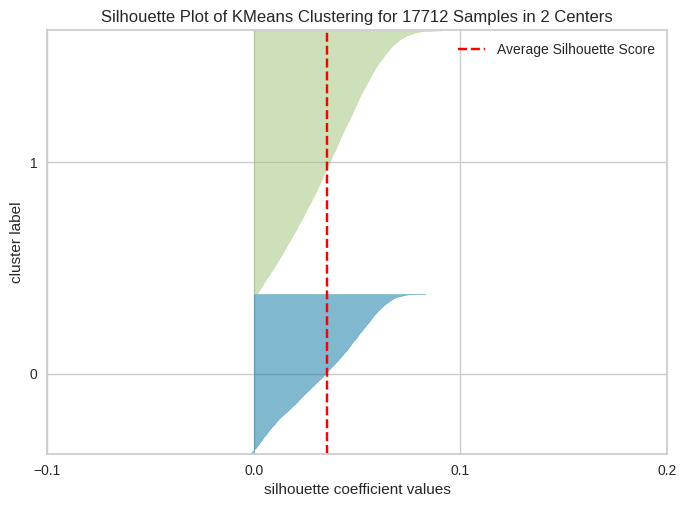

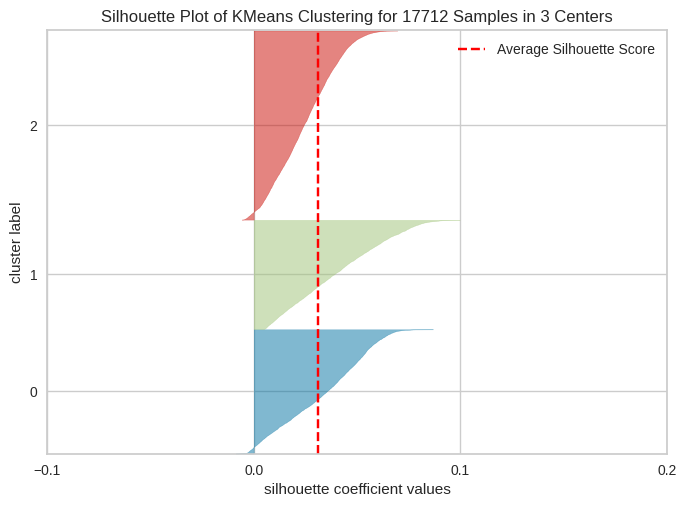

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

X = df_emb

for k in range(2,4):
    # Inicializa o modelo e o visualizador (usando a YellowBrick)
    model = KMeans(k, random_state=42, n_init=50)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Ajusta os dados ao visualizador
    visualizer.show()

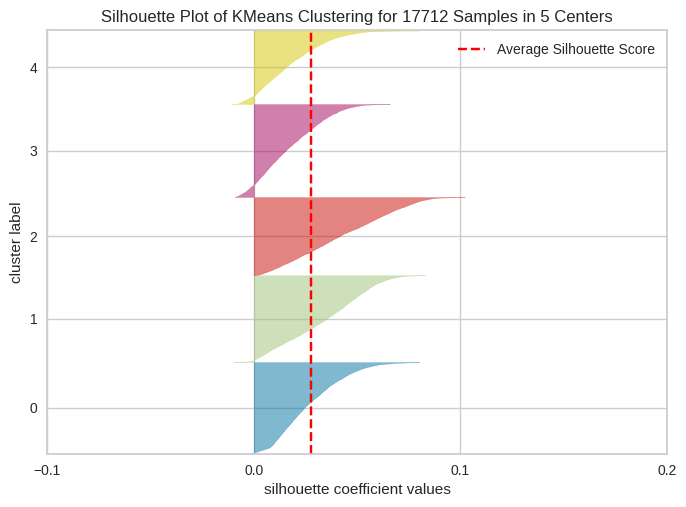

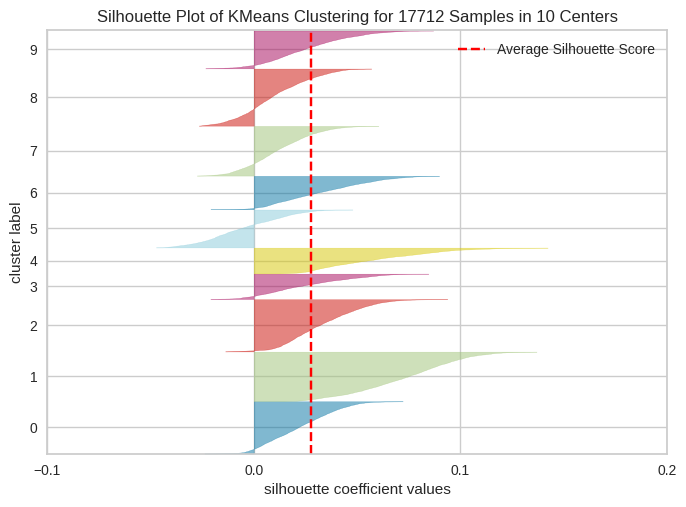

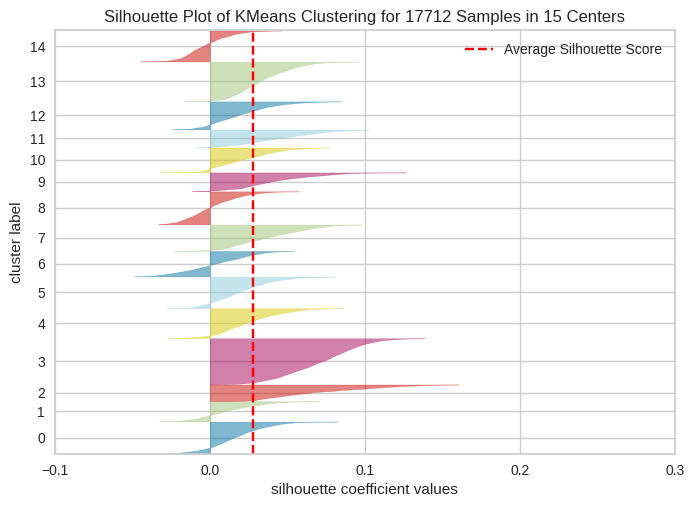

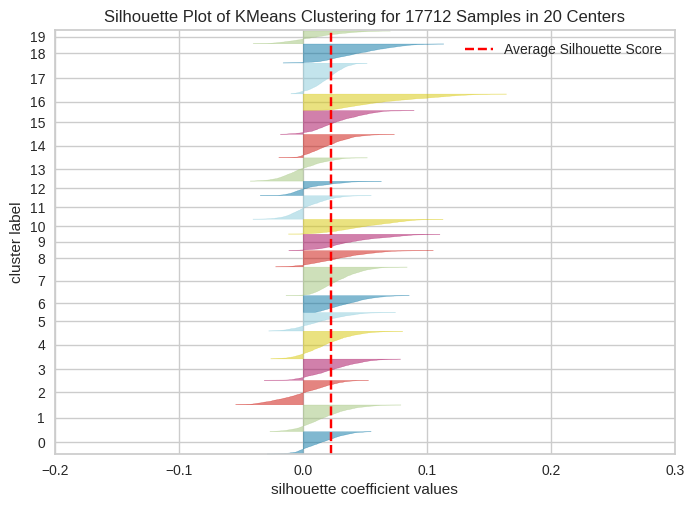

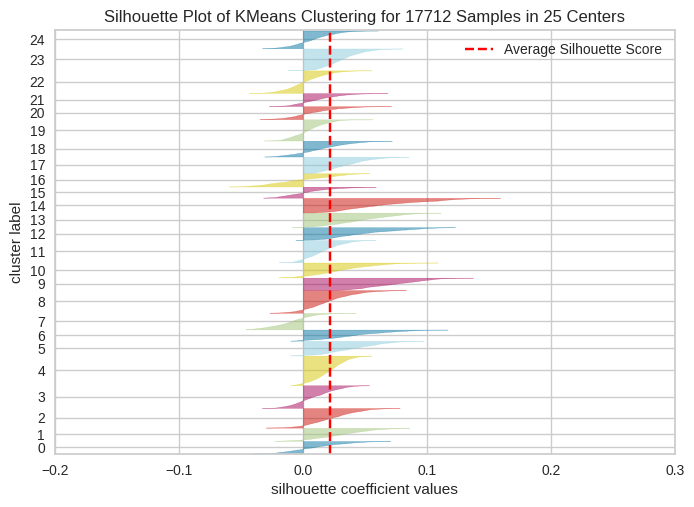

In [6]:
for k in range(5,30, 5):
    # Inicializa o modelo e o visualizador (usando a YellowBrick)
    model = KMeans(k, random_state=42, n_init=50)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Ajusta os dados ao visualizador
    visualizer.show()

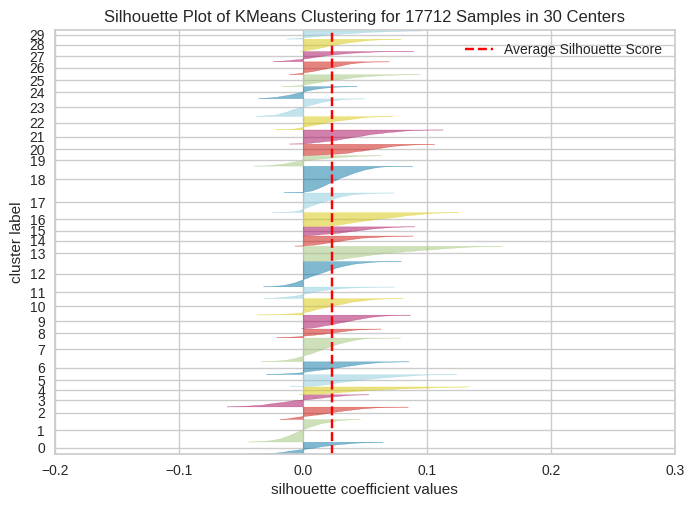

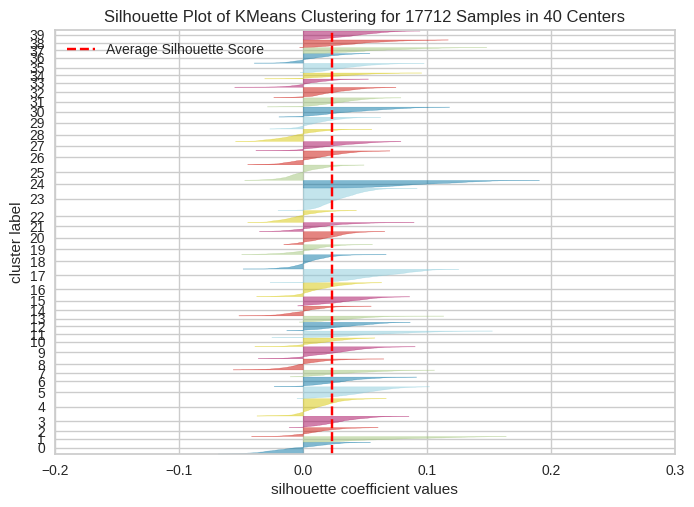

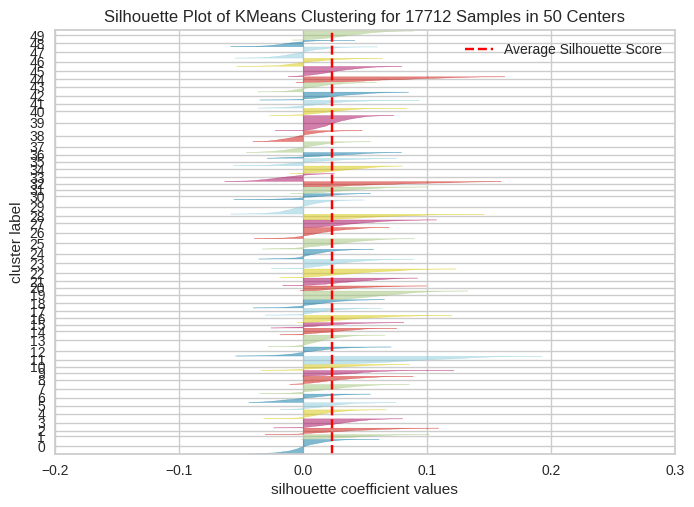

In [7]:
for k in range(30,60, 10):
    # Inicializa o modelo e o visualizador (usando a YellowBrick)
    model = KMeans(k, random_state=42, n_init=50)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Ajusta os dados ao visualizador
    visualizer.show()

In [9]:
kmeans = KMeans(n_clusters=30, random_state=0, n_init="auto").fit(df_emb)
kmeans.labels_

array([ 1, 23,  1, ..., 22,  4, 28], dtype=int32)

In [10]:
df_emb['clusters'] = kmeans.labels_
df_emb

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,clusters
unique_id,,,,,,,,,,,,,,,,,,,,,
28320,-0.019500,-0.001077,-0.02010,0.024440,-0.032100,-0.013504,0.031200,0.022630,-0.003990,0.04320,...,0.006676,0.02670,0.031740,0.013240,0.018080,0.01438,0.013350,-0.013290,-0.032070,1
36735,0.041840,-0.014670,-0.05762,0.036100,0.008460,-0.090200,-0.044600,0.042080,-0.020950,0.03104,...,-0.011550,-0.00843,-0.001452,0.006560,0.000865,-0.01087,-0.030260,0.001152,0.012970,23
36437,-0.059630,-0.039030,-0.05127,0.031080,-0.030330,-0.036200,-0.010414,0.003754,0.016340,0.01756,...,-0.002138,0.06097,-0.022930,0.002940,0.017610,-0.05460,0.016170,0.019420,0.034450,1
36652,0.016330,0.004032,-0.04710,0.002224,-0.021120,-0.009020,-0.004356,0.041930,0.001836,0.01639,...,0.022660,0.03156,-0.014400,0.049130,0.001088,-0.01406,0.002285,0.016630,0.043370,24
37105,-0.046880,0.005180,0.00521,-0.053620,-0.011040,-0.032470,-0.011010,0.056430,0.000260,-0.01164,...,-0.002071,0.03867,-0.018280,0.030470,-0.035370,0.07830,-0.009340,-0.002449,0.051200,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,0.001677,-0.057770,-0.04578,-0.027280,0.026750,-0.079100,0.050750,0.028440,-0.011400,0.02255,...,-0.008110,0.03564,0.016970,0.044770,-0.019940,0.04672,-0.050720,-0.006187,0.061950,6
25542,0.004005,-0.027190,-0.02230,-0.008010,0.021360,-0.039520,-0.016390,0.023240,-0.022930,0.02463,...,0.012370,0.01152,-0.014960,0.034730,0.020480,0.06800,0.003475,0.020140,0.000622,4
26006,0.028150,-0.008550,-0.04300,-0.015400,-0.022720,-0.100040,0.017260,0.087700,0.028000,0.03296,...,0.027100,-0.01115,0.023250,0.021960,-0.038540,0.01837,-0.022980,0.014640,0.071000,22


In [12]:
df_2 = df.loc[df_emb.index]
df_2['clusters'] = kmeans.labels_

In [19]:
with pd.option_context("display.max_colwidth", None):
    for i in range(30):
        display(f'----------------- CLUSTER {i} --------------------')
        display(df_2[df_2['clusters'] == i][['title']])

'----------------- CLUSTER 0 --------------------'

,title
unique_id,
36934,Paixão - Titânia e Bottom e Píramo e Tisbe em duas adaptações cinematográficas de Sonho de uma noite de verão
36937,Oneyda Alvarenga e a obra música popular brasileira (1945)
36690,Penelopeia: a urdidura dos silêncios da rainha de Ítaca
36980,Espetáculo midiático como manipulação das massas na adaptação cinematográfica Jogos vorazes: em chamas
36934,Paixão - Titânia e Bottom e Píramo e Tisbe em duas adaptações cinematográficas de Sonho de uma noite de verão
...,...
27198,Relações interartes: análise da personagem Jessica Jones e outras vozes marginais na graphic novel e na narrativa audiovisual
28653,Representatividade negra no Brasil: uma análise de personagem que revela caminhos
28633,Ecos da antiga Canaã: adaptando o conto de Aqhat para os quadrinhos.


'----------------- CLUSTER 1 --------------------'

,title
unique_id,
28320,Validação de modelos utilizando problemas inversos
36437,Gramep: método livre de alinhamento baseado no princípio de máxima entropia para a identificação de mutações snps e classificação de sequências biológicas
36418,Tesutã: um guia para apoiar a condução de testes metamórficos em chatbots
36145,Desenvolvimento de simulador de ocultações estelares: aplicação ao caso do possível planeta 9
36066,Identificação de espécies de pássaros em imagens utilizando redes neurais siamesas
...,...
36575,Combinação de áudio e sequência de imagens para recuperação de momento de vídeo por linguagem natural
36554,Modelo heurístico de seleção de características em aprendizado de máquina
26244,Avaliação de técnicas de colorimetria para quantificação de concentração aplicadas à engenharia química


'----------------- CLUSTER 2 --------------------'

,title
unique_id,
36952,Migração da erucamida em filmes de polietileno
36406,Avaliação do aumento da luminescência dos detectores CaF2 através da deposição de nanopartículas metálicas
35802,Nanopartículas de ouro aplicadas em células solares de perovskita
36078,Fisissorção do etanol em nanotubos de carbono de borda aberta
36717,Utilização da lignina modificada na substituição parcial de fenol em adesivos fenólicos aplicados em laminados de madeira
...,...
25527,"Expressão, purificação e caracterização de uma catalase de Serratia marcescens"
27787,Desenvolvimento de modelos de calibração multivariada para determinação de compostos fenólicos individuais em própolis
26073,Compósito polimérico produzido a partir de borracha triturada de pneus


'----------------- CLUSTER 3 --------------------'

,title
unique_id,
36976,Análise de contradições no desenho participativo de tecnologias sociais
36976,Análise de contradições no desenho participativo de tecnologias sociais
36085,A incorporação de processos digitais no trabalho artesanal da luteria de guitarras
34973,A impressão 3D como um novo paradigma para o design de superfícies têxteis
36187,Mapeamento sistemático de guideline em UX Writing
...,...
28630,Proposta de sistema visual para construtora GreenCon
28649,Design participativo e economia solidária: o papel da designer em um projeto editorial participativo
28632,Projeto gráfico de um aplicativo mobile que visa o fomento do pequeno produtor e da economia local


'----------------- CLUSTER 4 --------------------'

,title
unique_id,
36074,Desenvolvimento e análise de um regulador de pressão utilizando válvulas Tesla
36074,Desenvolvimento e análise de um regulador de pressão utilizando válvulas Tesla
36013,Avaliação do desempenho de uma bomba centrífuga operando com fluidos supercríticos
36847,Modelagem termodinâmica do equilíbrio líquido-vapor de fluidos refrigerantes com baixo potencial de aquecimento global
36242,Proposta de metodologia para simulação dinâmica do processo de gaseificação contracorrente utilizando softwares livres
...,...
24985,Redes neurais convolucionais profundas aplicadas na inspeção radiográfica de juntas soldadas
25244,Construção de uma bancada para aferição do empuxo de motores glow e estudo da influência da adição de nitrometano ao combustível
27017,Estudo analítico sobre a eficiência de caixas de gordura: desenvolvimento de protótipo em concreto e análise da influência do tempo de detenção hidráulica na sua eficiência


'----------------- CLUSTER 5 --------------------'

,title
unique_id,
36636,Elaboração de um modelo de plano de gestão de manutenção para um edifício residencial na cidade de Campo Mourão-PR
36529,Sensoriamento remoto para monitorar risco de ruptura de barragens
36770,"Proposta de manual uso, operação e manutenção no bloco J1 UTFPR - Campus PB: estudo de caso"
36379,Desenvolvimento de um sistema para gestão da manutenção em equipamentos laboratoriais
36772,Utilização de software BIM para simulação de construção de estação elevatória de esgoto
...,...
18608,Aplicação da engenharia da confiabilidade para concepção de novo projeto e recuperação das correntes de um resfriador de placas
11777,Implementação da manutenção centrada em confiabilidade em um moinho de trigo
25303,Políticas organizacionais de redução de custo de manutenção: análise da viabilidade de implantação de supressores de surto para mitigação de queimas e falhas de equipamentos eletrônicos em uma empresa de motores elétricos


'----------------- CLUSTER 6 --------------------'

,title
unique_id,
36182,Dimensionamento de um transportador de correia para pedreira: estudo de caso
36075,Análise de escoamento externo da asa dianteira de um carro de fórmula SAE® utilizando DFC
36182,Dimensionamento de um transportador de correia para pedreira: estudo de caso
36075,Análise de escoamento externo da asa dianteira de um carro de fórmula SAE® utilizando DFC
36077,Estudo aerodinâmico da fuselagem de uma aeronave rádio controlada
...,...
25242,Análise dinâmica do movimento vertical de um veículo offroad para competições Baja SAE
25216,Estudo da confiabilidade estrutural de sapatas submetidas a cargas centradas dimensionadas pelo CEB-70
26997,Eficiência dos sistemas Outrigger em edifícios altos de concreto armado


'----------------- CLUSTER 7 --------------------'

,title
unique_id,
36548,Mapeamento de fluxo de valor: proposta de construção enxuta para inovação em processos de serviços na construção civil
36548,Mapeamento de fluxo de valor: proposta de construção enxuta para inovação em processos de serviços na construção civil
36614,Estudo de caso: análise de patologias no Centro Municipal de Educação Infantil Sossego da Mamãe de Campo Mourão
36615,Estudo de caso sobre a utilização de conceitos da engenharia simultânea em uma construtora na cidade de Ubiratã – Paraná
36763,Dimensionamento de lajes pré-fabricadas utilizando o software TQS: aplicação em um sobrado residencial
...,...
27015,Análise de softwares estruturais e suas interoperabilidades com o BIM
26994,Aperfeiçoamento da gestão de obras de retrofit com ênfase na filosofia Lean Construction e no PMBOK
26990,Influência da medida do pé direito no valor de um imóvel


'----------------- CLUSTER 8 --------------------'

,title
unique_id,
36731,Análise ergonômica de estações de trabalho em setor de projetos com uso de computador: aplicação do método rosa
36731,Análise ergonômica de estações de trabalho em setor de projetos com uso de computador: aplicação do método rosa
36764,"Estudo sobre a percepção, utilização e fornecimento de equipamentos de proteção individual e coletiva em obras de pequeno porte no município de Itapejara D’Oeste - PR"
36618,Avaliação postural em trabalhos de pintura predial por meio do método REBA
35054,Análise de segurança viária na PRC 280: estudo de caso no trecho entre Pato Branco - PR e Mariópolis - PR
...,...
25488,Orientação para elaboração do plano de segurança contra incêndio e pânico para unidades básicas de saúde no estado do Paraná
4741,"Sofrer ou não sofrer, eis a questão: estratégias defensivas ao sofrimento no trabalho em comércio exterior"
5294,Avaliação de riscos para o trabalho rural por meio de análise multicritério


'----------------- CLUSTER 9 --------------------'

,title
unique_id,
36113,Avaliação da qualidade de projetos de software destinados ao setor de manufatura durante as etapas de desenvolvimento: uma contribuição
36113,Avaliação da qualidade de projetos de software destinados ao setor de manufatura durante as etapas de desenvolvimento: uma contribuição
36167,Desenvolvimento e validação de um método de custeio por margem de contribuição para uma empresa de automação com soluções em energia solar
36902,Avaliação do uso de etiquetas RFID para identificação e gestão de estoque de bobinas em uma indústria de autoadesivos
37027,A gestão da qualidade em uma empresa de estofados: um estudo de caso no setor de almoxarifado de tecidos
...,...
24701,Método de apontamento e cálculo de perdas produtivas para compor OEE em uma empresa metalúrgica
24386,Aplicação das ferramentas de qualidade BPF e 5S: estudo de caso na Cooperativa Regional dos Vitivinicultores do Sudoeste do Paraná
25570,Proposta para implantação de um estudo de tempos e métodos em uma indústria de confecções


'----------------- CLUSTER 10 --------------------'

,title
unique_id,
36236,Melhoria na qualidade da produção de água desmineralizada para uso em caldeiras
36761,Análise hidrológica em bacias hidrográficas no sudoeste do Paraná utilizando o software HEC-HMS
36275,"Peixes como bioindicadores de qualidade da água do Rio São Francisco Falso Braço Sul e Braço Norte, Paraná, Brasil"
36340,Simulação hidráulica de sistema do abastecimento de água e da rede coletora de esgoto sanitário do distrito de Taquara do Reino em Ibiporã - PR
36776,Estudo de viabilidade econômica de um projeto de captação de águas pluviais para fins não potáveis de uma instituição de ensino no município de Itapejara D’Oeste - PR
...,...
25393,"Utilização de geotecnologias para caracterização dos canais de ordem zero da APA na Bacia Hidrográfica Rio Piava - Umuarama, PR"
31883,Caracterização das águas estaurinas na praia da enseada em São Sebastião – SP
30658,Parâmetros da alface em função da disponibilidade de água e nutrientes: um estudo interdisciplinar


'----------------- CLUSTER 11 --------------------'

,title
unique_id,
36290,Estudo comparativo de tecnologias para o desenvolvimento de API's de geolocalização
36570,"Geração procedural de melodias com avaliação própria, análise de dados levantados pelas avaliações"
36569,Sistema web de gestão de documentos
36281,Coleta e gestão eficiente de dados agropecuários em uma arquitetura serverless de big data
36691,Arquitetura conteinerizada para plataforma de testes: coleta de dados de atividades maliciosas em sistemas industriais de água
...,...
25453,Análise da aplicação de recursos da Web 2.0 nas ferramentas de ITSM que suportam a ITIL
32122,Modelos de gerenciamento de enclaves para execução segura de componentes de software
25823,Ark project: aplicativo de gerenciamento de eventos


'----------------- CLUSTER 12 --------------------'

,title
unique_id,
36351,Colheita do trigo sob diferentes alturas de corte e seu efeito na cultura da soja
36998,Influência de híbridos de milho sobre a qualidade da silagem
36327,Ácido acetilsalicílico e ácido ascórbico no desempenho germinativo de sementes de soja
36990,Adubação de sistemas: impactos da aplicação antecipada de potássio na cultura da aveia para a soja em sucessão
36957,Adubação de sistemas: impactos da aplicação antecipada de fósforo na cultura da aveia para a soja em sucessão
...,...
27232,Silagem de grão úmido de aveia preta
25348,Características de pastos de milheto ou capim sudão sobressemeados na cultura da soja
26090,Avaliação da preservação da atividade antioxidante de sementes de milho submetidas à secagem contínua e intermitente


'----------------- CLUSTER 13 --------------------'

,title
unique_id,
36103,Armazenamento na qualidade pós-colheita da goiaba (Psidium guajava L.)
36392,"Produção e caracterização de aguardente à base de banana, mel e erva mate ultra refinada"
36099,Efeito da adição de lavanda (Lavandula angustifolia) na qualidade microbiológica de queijo de massa semicozida
36526,Estudo físico-químico de kombucha com pólen
36131,Desenvolvimento de cerveja artesanal com adição de casca de abacaxi
...,...
26018,Qualidade tecnológica de farinhas suplementadas com glúten vital e aplicadas a panificação
25979,Elaboração de produto cárneo fermentado tipo hambúrguer
23941,Plantas alimentícias não convencionais como possibilidades na merenda escolar


'----------------- CLUSTER 14 --------------------'

,title
unique_id,
36547,Protótipo de sistema integrado de controle da restrição de fluxo sanguíneo no exercício físico
36578,Avaliação da dor e força muscular de tronco após treinamento em suspensão em mulheres com dor lombar crônica
36914,Perfil nutricional e saúde óssea de idosos: alimentação e sintomas gastrointestinais como fatores interferentes
36120,Análise de conforto relacionado à vibração em veículos de passeio
34341,Um estudo da resistência cardiorrespiratória: um fator de qualidade de vida para alunos da educação básica
...,...
23644,Estudo comparativo entre progressão de feridas de diabéticos e não diabéticos utilizando nova tecnologia de avaliação vulnerária
24685,Utilização da termografia para detecção do fenômeno de Raynaud secundário
27978,Influência de dispositivos de fiscalização eletrônica de velocidade no comportamento do condutor em cenário urbano


'----------------- CLUSTER 15 --------------------'

,title
unique_id,
35964,Controle de tensão adaptativo para sistemas de distribuição com geração fotovoltaica distribuída operando com nuvens
36637,Projeto de análise da eficiência energética do Museu Casa das Rosas de São Paulo - SP conforme parâmetros do programa nacional de etiquetagem (RTQ-C)
36538,Panorama da microgeração e minigeração de energia fotovoltaica no Brasil de (2012 a 2023)
36331,Análise da viabilidade técnica e econômica de um sistema fotovoltaico em uma escola municipal de Campo Mourão – PR
36867,Veículos elétricos e sustentabilidade: uma análise comparativa do impacto ambiental e energético em relação aos veículos de combustão interna
...,...
23622,Análise exergética de uma planta de cogeração híbrida solar/biomassa
26189,Implementação de algoritmo em software para cálculo de energia incidente e ATPV
31884,Construção e implementação de um protótipo de secador solar para secagem de madeira


'----------------- CLUSTER 16 --------------------'

,title
unique_id,
36430,Análise da percepção dos discentes sobre o desempenho acadêmico e o uso das redes sociais em sala de aula no curso de ciências contábeis da Universidade Tecnológica Federal do Paraná - Câmpus Pato Branco
36430,Análise da percepção dos discentes sobre o desempenho acadêmico e o uso das redes sociais em sala de aula no curso de ciências contábeis da Universidade Tecnológica Federal do Paraná - Câmpus Pato Branco
35861,Implementação da sustentabilidade nas universidades federais: uma análise dos planos de desenvolvimento institucionais
36719,Professores pelo mundo: experiências de internacionalização no ensino de graduação
36044,TUT – 50 anos de teatro
...,...
24345,Método para medição de utilização de espaços físicos em universidades baseado em modelos industriais
25423,"A evasão no curso de licenciatura em química da Universidade Tecnológica Federal do paraná, câmpus Londrina"
28137,Sistema de recomendação de instituição de ensino superior para atenuar evasão utilizando análise de perfis de egressos


'----------------- CLUSTER 17 --------------------'

,title
unique_id,
36049,Educação CTS em ciências da natureza e sua contribuição no enfrentamento da pós-verdade: da discussão da formação de professores a aplicação de um itinerário formativo no novo ensino médio
36049,Educação CTS em ciências da natureza e sua contribuição no enfrentamento da pós-verdade: da discussão da formação de professores a aplicação de um itinerário formativo no novo ensino médio
36278,As implicações da proposição da BNCC no ensino de Ciências da Natureza do Ensino Fundamental anos finais
36272,O ensino de biologia celular e o uso de modelos didáticos: o ovo de ave (galinha/Gallus domesticus) como exemplo
36342,Espectroscopia da luz na educação básica
...,...
24602,Contribuições de um jogo didático na mobilização de funções psicológicas superiores
26881,Elementos de filosofia e história da ciência: uma contribuição para o ensino de Física com base na obra de Alexandre Koyré
26882,Wilhem Röntgen e a descoberta dos raios X: aspectos da história da ciência nos livros didáticos em ensino de Física


'----------------- CLUSTER 18 --------------------'

,title
unique_id,
36715,"Levantamento da vegetação arbórea do parque urbano Luiz Balboni “Lagoa do Guapé”, como subsídio para estratégias de manejo e conservação"
36960,Diagnóstico de arborização urbana e acessibilidade no bairro Santa Terezinha de Pato Branco - PR
36534,"Ensaio de um resgate de plantas em áreas degradadas como estratégia de produção de mudas em Campo Mourão, Paraná"
36830,Simulação da gaseificação da casca de Pinus Elliottii através do software DWSIM
36537,Modelagem de nicho ecológico para espécies de planta ameaçadas no estado do Paraná visando a identificação e preservação de áreas chave (hotspots)
...,...
28572,Estudo comparativo de abordagens computacionais para classificação de imagens de satélite da Amazônia
31887,Fachada verde “a influência no conforto térmico entre espécies de trepadeiras”
29303,"Gestão de populações de truta-de-rio (Salmo trutta, L.) em rios do nordeste de Portugal: Será possível compatibilizar a conservação com a exploração de recursos piscícolas?"


'----------------- CLUSTER 19 --------------------'

,title
unique_id,
35756,Space-division multiple access-based beamforming for multi-user batteryless machine-type communications
36161,Soluções opensource para coleta e análise de dados de telemetria via rádio frequência
36568,Sistema de para monitoramento de desempenho de velocistas usando tecnologias de baixo custo
36064,Aprimorando o desempenho da rede através da agregação de links em um ambiente de cluster Spark
36380,Projeto de um sistema Holter com envio de dados para armazenamento remoto via app mobile
...,...
26084,Sistema de semáforo inteligente utilizando o protocolo ESP-NOW
26023,Desenvolvimento de um oxímetro através de tecnologias IoT aplicado à dispositivos móveis
25879,"Protótipo de tomada eletrônica para proteção, controle e monitoramento de equipamentos domésticos"


'----------------- CLUSTER 20 --------------------'

,title
unique_id,
36246,Avaliação do indicador de desempenho “Frequência de efeito anódico” na indústria de alumínio
36611,Comportamento mecânico de mistura solo-RCC-cimento para pavimentação
36052,Influência da composição química do cimento supersulfatado sujeito à carbonatação natural
36773,Análise da viabilidade técnica e econômica da substituição parcial do cimento Portland por filler calcário na produção de peças de concreto destinadas a pavimentação
36623,Efeito de tratamentos térmicos em um aço inoxidável duplex produzido por Laser Powder Bed Fusion
...,...
27000,Avaliação da frequência de aplicação do concreto autoadensável no Brasil
26993,Estudo da viabilidade da utilização de espectrofotometria na determinação do teor de sulfatos em matrizes cimentícias
25518,Efeitos da adição de resíduo de cinza de caldeira em misturas de solo e cimento na absorção de água e na resistência à compressão simples


'----------------- CLUSTER 21 --------------------'

,title
unique_id,
37002,Análise física do solo e produtividade da soja sob diferentes cobertura vegetais em sistema plantio direto
37000,Sistemas de plantio direto e a percepção dos produtores: aplicação de índice de qualidade participativo (IQP)
36964,Avaliação química no perfil do solo após o uso de diferentes fertilizantes
36997,Micromorfologia de solo em diferentes sistemas de manejo: avaliação preliminar da aplicação da microscopia de varredura
36962,Atributos químicos e fracionamento físico da matéria orgânica do solo sob diferentes sistemas de manejo
...,...
27550,Mapeamento de cobertura e uso de solo a partir de dados de sensoriamento remoto utilizando redes neurais
25658,Avaliação da capacidade máxima de adsorção de fósforo na fração argila de latossolos da região do triângulo mineiro
30665,Modelos de regressão aplicados ao rendimento de grãos do milho em função dos atributos químicos do solo


'----------------- CLUSTER 22 --------------------'

,title
unique_id,
36994,Indução de calos in vitro em diferentes explantes de mandioquinha-salsa (Arracacia xanthorrhiza Bancroft.)
36956,Efeito alelopático do hidrolato da vassourinha Baccharis dracunculifolia sobre germinação de sementes
36992,Influência de porta-enxertos na ocorrência de bacteriose foliar no pessegueiro ‘BRS Kampai’
37063,Determinação da concentração do ácido kójico a partir da fermentação do arroz e desafios na divulgação científica
36273,Métodos de superação de dormência em sementes de plantas daninhas
...,...
24745,Revisão sobre utilização de óleos essenciais de diferentes espécies vegetais como terapia alternativa no tratamento da depressão
26284,Extração de compostos hidrossolúveis do arilo carnoso (endocarpo) da Passiflora edulis f. flavicarpa e avaliação de sua atividade citotóxica/antitumoral
26092,Otimização do processo de extração de compostos bioativos do zingiber officinale (gengibre) para incorporação em lipossomas e estudo do potencial em aplicações farmacêuticas


'----------------- CLUSTER 23 --------------------'

,title
unique_id,
36735,Destinação do lodo de estação de tratamento de água em estação de tratamento de esgotos: avanços teóricos e experimentais
36735,Destinação do lodo de estação de tratamento de água em estação de tratamento de esgotos: avanços teóricos e experimentais
37069,Efeito da temperatura na cinética de espécies reativas nitrogenadas por plasma frio de ar atmosférico na pós-descarga
37070,Desenvolvimento de hidro/biocarvões a partir de erva-mate para remoção de propranolol em água
36533,Produção de biogás com resíduos sólidos urbanos com adição de ácido acético: análise da atividade metanogênica específica (AME)
...,...
26290,"Tratamento da água e análise da mutagenicidade da população da Vila Rural Água Viva-Francisco Beltrão-PR, ambientalmente exposta a agroquímicos"
31888,Uso de lodo têxtil como substrato para a produção de mudas de erva-mate
26998,Análise sobre o nível de confiabilidade de detergentes biodegradáveis existentes no varejo


'----------------- CLUSTER 24 --------------------'

,title
unique_id,
36652,Frações na perspectiva de medição e a abordagem instrucional 4A: uma análise dos processos de raciocínio matemático manifestados por estudantes do 5º ano do ensino fundamental
37105,Consciência fonológica na alfabetização: proposta de material didático em inglês para 2º e 3º anos do ensino fundamental
37035,"Proposta de uso de um jogo pedagógico: ""Jogo de cartas: estrutura terrestre"" com estudantes com transtorno do espectro autista do 6º ano em uma escola pública do Paraná"
36652,Frações na perspectiva de medição e a abordagem instrucional 4A: uma análise dos processos de raciocínio matemático manifestados por estudantes do 5º ano do ensino fundamental
37105,Consciência fonológica na alfabetização: proposta de material didático em inglês para 2º e 3º anos do ensino fundamental
...,...
28648,História oral e histórias em quadrinhos: contribuições do design gráfico e do conceito de texto multimodal na produção de um recurso educacional aberto
30685,Reflexos das frações ensinadas em cadernos escolares do quinto ano
30657,Modelagem matemática e jogos digitais: possibilidades para a educação básica


'----------------- CLUSTER 25 --------------------'

,title
unique_id,
36860,Desenvolvimento de um inversor de tração para um veículo urbano leve híbrido-flex
36860,Desenvolvimento de um inversor de tração para um veículo urbano leve híbrido-flex
36597,"Construção, identificação, controle e análise de sistemas de estabilidade e posicionamento de um quadrirotor com um grau de liberdade: estudo de caso"
36862,Desenvolvimento de módulo didático para ensino de controle PID baseado no problema barra-bola
36778,Controle de um pêndulo de Furuta com aprendizado por reforço
...,...
27599,"Transformador monofásico: cálculo, simulações e testes"
24563,Montagem de um sistema de circulação fechado de água para testes experimentais em coletores solares
24492,Desenvolvimento de conversores eletrônicos de energia com estágio único e elevado fator de potência para acionar e controlar iluminação de estado sólido


'----------------- CLUSTER 26 --------------------'

,title
unique_id,
36109,Viabilidade econômica da prestação de serviços tercerizados de colheita mecanizada de grãos
36130,Avaliação de planta e processo produtivo de carne de peru quanto ao atendimento dos requisitos de exportação para união europeia
36633,Estudo das etapas de construção de uma moega rodoviária de concreto armado
36228,Estudo de viabilidade técnica e econômica para aumento de produtividade de uma planta de biogás
34755,"Indicadores de desenvolvimento sustentável na agroindústria familiar do sudoeste do Paraná: uma análise social, econômica e ambiental"
...,...
27172,Sistema web para controlar o balanceamento nutricional do gado leiteiro
24556,Modelo de avaliação técnica e econômica do uso de biodigestores na geração de energia elétrica e biofertilizante com dejetos da bovinocultura
25976,Deep learning como ferramenta na detecção e classificação de doenças agrícolas em folhas


'----------------- CLUSTER 27 --------------------'

,title
unique_id,
36497,Contabilidade no terceiro setor: uma análise sobre a percepção dos profissionais contábeis no município de Pato Branco - PR
36259,Inovação organizacional sob a ótica da gestão do conhecimento: uma análise qualitativa de um banco de ideias como impulsionador da mudança
36497,Contabilidade no terceiro setor: uma análise sobre a percepção dos profissionais contábeis no município de Pato Branco - PR
36259,Inovação organizacional sob a ótica da gestão do conhecimento: uma análise qualitativa de um banco de ideias como impulsionador da mudança
36791,Avaliação de um programa de inovação aberta: um estudo de caso em uma indústria moveleira
...,...
26867,Análise do método de gestão de riscos para concessão de crédito em uma cooperativa de crédito
26999,Teoria das estruturas organizacionais de Henry Mintzberg: um estudo de caso com construtoras de Curitiba e da região metropolitana
25528,Proposta de mapeamento de competências para atuação do trabalhador no contexto da indústria 4.0


'----------------- CLUSTER 28 --------------------'

,title
unique_id,
36681,"Arquitetura e poder: desigualdades de gênero, classe e raça nos apartamentos de Curitiba (1927-1972)"
36681,"Arquitetura e poder: desigualdades de gênero, classe e raça nos apartamentos de Curitiba (1927-1972)"
36543,Desenvolvimento sustentável e ação climática: como as cidades podem ser parte da solução
36777,Estudo de viabilidade para implantação de uma rota cicloviária interligando a praça Getúlio Vargas ao Parque Estadual Vitório Piassa no município de Pato Branco - PR
36138,O potencial das compras públicas no desenvolvimento local: uma análise dos municípios paranaenses
...,...
24958,Avaliação da eficácia das recomendações do Tribunal de Contas do Estado para melhoria da qualidade da educação básica municipal
27510,Acessibilidade e mobilidade urbana para pedestres: uma análise na área central da cidade de Pato Branco - PR
28847,Pronto Curitiba: atendimento de urgência na rede privada de saúde


'----------------- CLUSTER 29 --------------------'

,title
unique_id,
36836,Parques tecnológicos e resíduos sólidos urbanos: tecnologia social e desenvolvimento sustentável
36042,Vantagens e desvantagens na substituição da queima de cavaco de eucalipto por um queimador de resíduo agrícola como fonte de energia na secagem direta de grão na região dos Campos Gerais - PR
36836,Parques tecnológicos e resíduos sólidos urbanos: tecnologia social e desenvolvimento sustentável
36042,Vantagens e desvantagens na substituição da queima de cavaco de eucalipto por um queimador de resíduo agrícola como fonte de energia na secagem direta de grão na região dos Campos Gerais - PR
36798,Produção de biogás a partir de residuos de indústrias de frutas
...,...
23582,Gerenciamento dos resíduos de construção e demolição: estudo de caso no município de Pitanga - PR
26322,Estimativa da geração de biogás e do potencial energético: estudo de caso no aterro sanitário do município de Campo Mourão - Paraná
31885,Estimativa do potencial energético teórico a partir da queima de metano proveniente do aterro sanitário de Francisco Beltrão–PR
